# Problem #1

You are given 5 data points sampled (without noise) from a fourth degree polynomial.

$$(-0.5,7.625),(-0.2,9.3632),(0.5,9.625),(0.75,8.7578),(1,8)$$

solve for the polynomial’s coefficients (a0, a1, a2, a3, a4). You have to formulate this curve
fitting problem as the solution to a linear system of equations, with 5 equations and 5 unknowns. Each equation corresponds to one data point, and can be thought of as a constraint
on the possible fourth degree polynomials. Write a Python script to generate the system
and solve it using the method shown in class, matrix inverse. Set up the coefficients matrix
A, the column bias vector b, then the solution to the system will be your coefficients, that
you compute as follows: x = A−1
b.

$$ f(x) = a_0 + a_1x^1 + a_2x^2 + a_3x^3 + a_4x^4 $$



$$ a_0 + a_1(-0.5) + a_2(-0.5)^2 + a_3(-0.5)^3 + a_4(-0.5)^4 = 7.625 $$
$$ a_0 + a_1(-0.2) + a_2(-0.2)^2 + a_3(-0.2)^3 + a_4(-0.2)^4 = 9.3632 $$
$$ a_0 + a_1(0.5) + a_2(0.5)^2 + a_3(0.5)^3 + a_4(0.5)^4 = 9.625 $$
$$ a_0 + a_1(0.75) + a_2(0.75)^2 + a_3(0.75)^3 + a_4(0.75)^4 = 8.7578 $$
$$ a_0 + a_1(1) + a_2(1)^2 + a_3(1)^3 + a_4(1)^4 = 8 $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([-0.5,-0.2,0.5,0.75,1.0])
y = np.array([7.625,9.3632,9.625,8.7578,8.0])

Text(0, 0.5, 'f(x)')

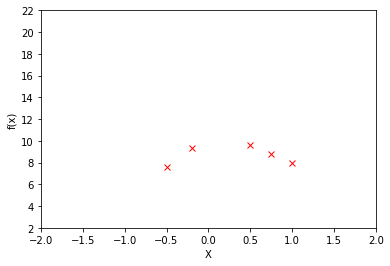

In [3]:
plt.figure()
plt.plot(X, y, 'rx')
plt.xticks(np.arange(-2, 2.5, step=0.5))
plt.yticks(np.arange(2, 24, step=2.0))
plt.xlabel('X')
plt.ylabel('f(x)')

## Getting the coefficients

Each x value goes through a fourth degree polynomial function

```python
lambda x: (x/x, x, x**2, x**3, x**4)
```
which returns the values for $$a_0, a_1, a_2, a_3, a_4$$

In [4]:
coefficients = lambda x: (x/x, x, x**2, x**3, x**4)

In [5]:
A = coefficients(X)
A = np.transpose(A)
print(A)

[[ 1.         -0.5         0.25       -0.125       0.0625    ]
 [ 1.         -0.2         0.04       -0.008       0.0016    ]
 [ 1.          0.5         0.25        0.125       0.0625    ]
 [ 1.          0.75        0.5625      0.421875    0.31640625]
 [ 1.          1.          1.          1.          1.        ]]


In [6]:
print(f"coefficents of for (-0.5,  7.625) a0={A[0][0]}, a1={A[0][1]}, a2={A[0][2]}, a3={A[0][3]}, a4={A[0][4]}")
print(f"coefficents of for (-0.2, 9.3632) a0={A[1][0]}, a1={A[1][1]}, a2={A[1][2]:.4f}, a3={A[1][3]:.4f}, a4={A[1][4]:.4f}")
print(f"coefficents of for (0.5,   9.625) a0={A[2][0]}, a1={A[2][1]}, a2={A[2][2]}, a3={A[2][3]}, a4={A[2][4]}")
print(f"coefficents of for (0.75, 8.7578) a0={A[3][0]}, a1={A[3][1]}, a2={A[3][2]}, a3={A[3][3]}, a4={A[3][4]}")
print(f"coefficents of for (1,         8) a0={A[4][0]}, a1={A[4][1]}, a2={A[4][2]}, a3={A[4][3]}, a4={A[4][4]}")

coefficents of for (-0.5,  7.625) a0=1.0, a1=-0.5, a2=0.25, a3=-0.125, a4=0.0625
coefficents of for (-0.2, 9.3632) a0=1.0, a1=-0.2, a2=0.0400, a3=-0.0080, a4=0.0016
coefficents of for (0.5,   9.625) a0=1.0, a1=0.5, a2=0.25, a3=0.125, a4=0.0625
coefficents of for (0.75, 8.7578) a0=1.0, a1=0.75, a2=0.5625, a3=0.421875, a4=0.31640625
coefficents of for (1,         8) a0=1.0, a1=1.0, a2=1.0, a3=1.0, a4=1.0



a_0 - 0.5a_1 + 0.25a_2 - 0.125a_3 + 0.0625a_4 = 7.625 <br>
a_0 - 0.2a_1 + 0.04a_2 - 0.008a_3 + 0.0016a_4 = 9.3632 <br>
a_0 + 0.5a_1 + 0.25a_2 + 0.125a_3 + 0.0625a_4 = 9.625 <br>
a_0 + 0.75a_1 + 0.5625a_2 + 0.421875a_3 + 0.31640625a_4 = 8.7578 <br>
a_0 + a_1 + a_2 + a_3 + a_4 = 8

## This describes the family of fourth degree polynomials

```python
lambda a, x: a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3 + a[4]*x**4
```

In [7]:
f = lambda a, x: a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3 + a[4]*x**4

In [8]:
y_transposed = np.transpose(y)

In [9]:
a = np.linalg.inv(A).dot(y_transposed) # y does not need to be transposed. (np.dot() knows how to interpret it)
a

array([ 1.00000084e+01,  2.00003368e+00, -6.00007579e+00, -1.34736842e-04,
        2.00016842e+00])

In [10]:
domain = np.linspace(-2, 2, 100)
values = f(a, domain)

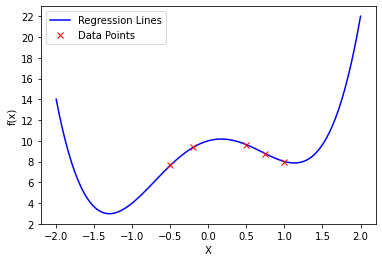

In [11]:
plt.figure()
plt.plot(domain, values, 'b-')
plt.plot(X, y, 'rx')
plt.xticks(np.arange(-2, 2.5, step=0.5))
plt.yticks(np.arange(2, 24, step=2.0))
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend(['Regression Lines', 'Data Points'])

# Problem 2

In this problem, you are given some code that samples data points from a known cubic
(generated at random):

```python
import numpy as np
import matplotlib.pyplot as plt
# this defines the family of cubics
f = lambda w, x: w[0] + w[1]*x + w[2]*(x**2) + w[3]*(x**3)
# sample 20 equally spaced values between -2 and 2
dom = np.linspace(-2, 2, 20)
# generate noisy data points, as values of a particular cubic + noise
val = f(w, dom) + np.random.randn(20)/2
# generate ground truth samples for visualization only
val_truth = f(w, dom)
# plot
fig, ax = plt.subplots(1, 1)
ax.plot(dom, val, 'bx')
ax.plot(dom, val_truth, '-g')
ax.legend(('Noisy samples', 'Ground truth'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Noisy samples and ground truth function')

```
formulate an overdetermined system of linear equations (linear with respect to model parameters). This system will have more
equations than unknowns, hence an exact solution does not exist. However, an approximate solution exists and can be found by least squares. You will use a numpy implementation of such a function, from the linear algebra package, called: lstsq. A complete
reference to this function can be found here: https://docs.scipy.org/doc/numpy-1.13.
0/reference/generated/numpy.linalg.lstsq.html.

In [12]:
# known cubic (generated at random)
X = np.random.randn(4)

In [13]:
# this defines the family of cubics
f = lambda w, x: w[0] + w[1]*x + w[2]*(x**2) + w[3]*(x**3)

In [14]:
# sample 20 equally spaced values between -2 and 2
dom = np.linspace(-2, 2, 20)
dom

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

In [15]:
# generate noisy data points, as values of a particular cubic + noise
val = f(X, dom) + np.random.randn(20)/2

In [16]:
# generate ground truth samples for visualization only
val_truth = f(X, dom)

Text(0.5, 1.0, 'Noisy samples and ground truth function')

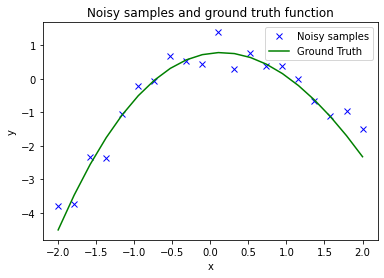

In [17]:
#plot
fig, ax = plt.subplots(1, 1)
ax.plot(dom, val, 'bx')
ax.plot(dom, val_truth, '-g')
ax.legend(('Noisy samples', 'Ground Truth'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Noisy samples and ground truth function')

Each x values goes through a cubic function to generate the coefficients

```python
lambda x: (x/x, x, x**2, x**3)
```

In [18]:
coefficients = lambda x: (x/x, x, x**2, x**3)

In [19]:
A = coefficients(dom)
A = np.transpose(A)
print(A)

[[ 1.00000000e+00 -2.00000000e+00  4.00000000e+00 -8.00000000e+00]
 [ 1.00000000e+00 -1.78947368e+00  3.20221607e+00 -5.73028138e+00]
 [ 1.00000000e+00 -1.57894737e+00  2.49307479e+00 -3.93643388e+00]
 [ 1.00000000e+00 -1.36842105e+00  1.87257618e+00 -2.56247266e+00]
 [ 1.00000000e+00 -1.15789474e+00  1.34072022e+00 -1.55241289e+00]
 [ 1.00000000e+00 -9.47368421e-01  8.97506925e-01 -8.50269719e-01]
 [ 1.00000000e+00 -7.36842105e-01  5.42936288e-01 -4.00058318e-01]
 [ 1.00000000e+00 -5.26315789e-01  2.77008310e-01 -1.45793847e-01]
 [ 1.00000000e+00 -3.15789474e-01  9.97229917e-02 -3.14914711e-02]
 [ 1.00000000e+00 -1.05263158e-01  1.10803324e-02 -1.16635078e-03]
 [ 1.00000000e+00  1.05263158e-01  1.10803324e-02  1.16635078e-03]
 [ 1.00000000e+00  3.15789474e-01  9.97229917e-02  3.14914711e-02]
 [ 1.00000000e+00  5.26315789e-01  2.77008310e-01  1.45793847e-01]
 [ 1.00000000e+00  7.36842105e-01  5.42936288e-01  4.00058318e-01]
 [ 1.00000000e+00  9.47368421e-01  8.97506925e-01  8.50269719e

In [20]:
val_trasnposed = np.transpose(val)
val_trasnposed

array([-3.80816937, -3.74965848, -2.32065012, -2.37476681, -1.03735831,
       -0.21813414, -0.05929216,  0.69411976,  0.5233467 ,  0.42899345,
        1.39174633,  0.30235683,  0.77124618,  0.38499978,  0.38355696,
       -0.01190194, -0.6566842 , -1.11692609, -0.97390803, -1.5075818 ])

In [21]:
w, residuals, rank, s = np.linalg.lstsq(A, val_trasnposed, -1)
print(f"Values of w (learned coefficents for the least-squares): {w}")

Values of w (learned coefficents for the least-squares): [ 0.7247154   0.30130312 -0.93130446  0.09107091]


In [22]:
learned_values = f(w, dom)

### Plot
- Points with noise represented with blue x's
- The ground truth (actual line) represented with a green line
- The learned model represented with a red line

Text(0.5, 1.0, 'Noisy samples and ground truth function')

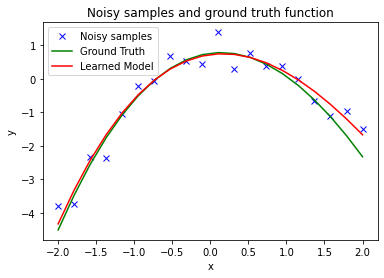

In [23]:
fig, ax = plt.subplots(1, 1)
ax.plot(dom, val, 'bx')
ax.plot(dom, val_truth, '-g')
ax.plot(dom, learned_values, '-r')
ax.legend(('Noisy samples', 'Ground Truth', 'Learned Model'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Noisy samples and ground truth function')

##### We can approximate the solution to the overdetermined system by getting the solution by Normal Equations:

$$ minimize: A\vec{x} - \vec{b} $$
where Ax is a vector in range(A).

We want the orthogonal projection of b onto the space spanned by the columns of A:

Ortogonal projection:
$$p=A(A^TA)^{-1}A^T$$

This means pb = Ax
$$A(A^TA)^{-1}A^T\vec{b} = Ax$$

dividing both sides by A:

$$\frac{A(A^TA)^{-1}A^T\vec{b}}{A} = \frac{Ax}{A}$$

We end up with the following:

$$ \hat{\beta} = (A^TA)^{-1} A^T \vec{b} $$

where 
$$\hat{\beta} = x$$

In [24]:
# beta_hat = np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A).dot(val))
A_transposed = np.transpose(A)
A_transposed_A = A_transposed.dot(A)
A_tansposed_b = A_transposed.dot(val)
beta_hat = np.linalg.inv(A_transposed_A).dot(A_tansposed_b)

In [25]:
print(f"Values of beta_hat (learned coefficents for the least-squares): {beta_hat}")

Values of beta_hat (learned coefficents for the least-squares): [ 0.7247154   0.30130312 -0.93130446  0.09107091]


In [26]:
learned_values = f(beta_hat, dom)

### Plot
- Points with noise represented with blue x's
- The ground truth (actual line) represented with a green line
- The learned model represented with a red line

Text(0.5, 1.0, 'Ground truth function Vs. Learned function')

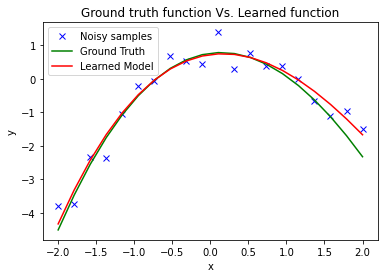

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(dom, val, 'bx')
ax.plot(dom, val_truth, '-g')
ax.plot(dom, learned_values, '-r')
ax.legend(('Noisy samples', 'Ground Truth', 'Learned Model'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Ground truth function Vs. Learned function')

In [28]:
r = A.dot(beta_hat) - val

Text(0.5, 1.0, 'Ground truth function Vs. Learned function')

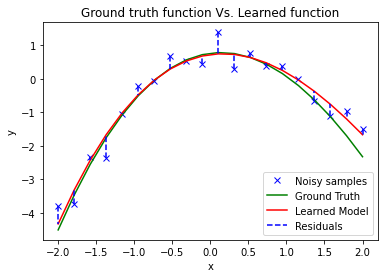

In [29]:
plt.figure()
plt.plot(dom, val, 'bx')
plt.plot(dom, val_truth, '-g')
plt.plot(dom, learned_values, '-r')


for i in range(len(r)):
  plt.plot([dom[i], dom[i]], [val[i], learned_values[i]], 'b--')

plt.legend(('Noisy samples', 'Ground Truth', 'Learned Model', 'Residuals'))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ground truth function Vs. Learned function')